<a href="https://colab.research.google.com/github/OseiasBeu/FormacaoMachineLearningAvancada/blob/main/Deep_Learning_Previsao_Com_Keras/curso_deep_learning_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [94]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exploração

In [95]:
passageiros = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/Passageiros.csv')

In [96]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

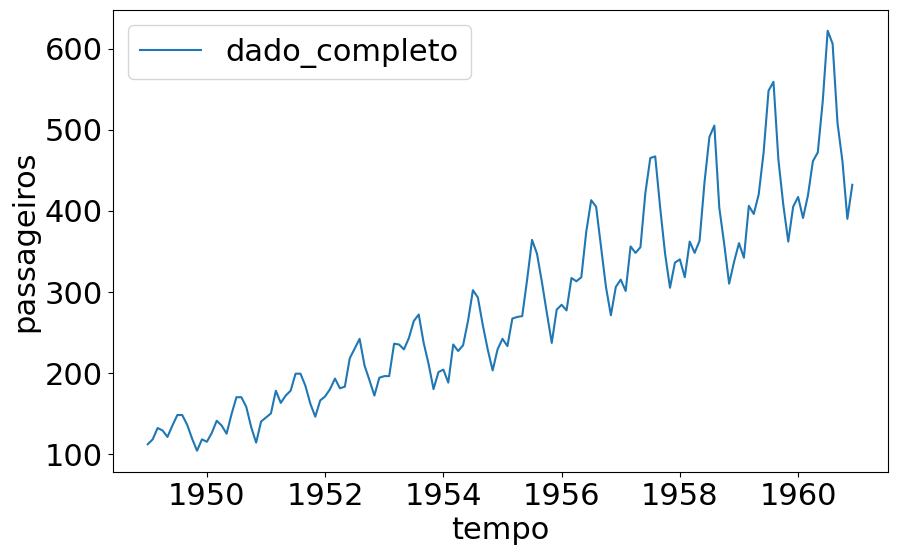

In [97]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')

# Pré processamento

In [98]:
sc = StandardScaler()

In [99]:
sc.fit(passageiros)

StandardScaler()

In [100]:
dado_escalado = sc.transform(passageiros)

In [101]:
X = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

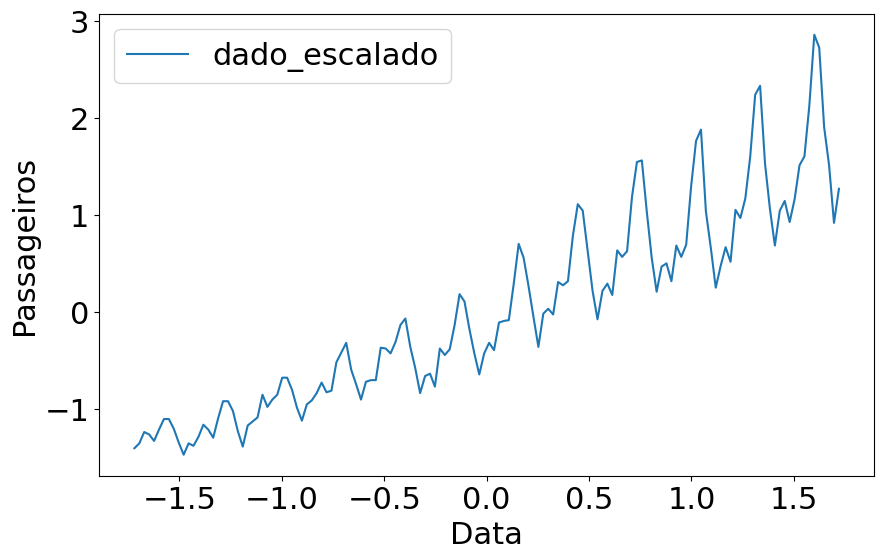

In [102]:
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [103]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [104]:
xtreino = X[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = X[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

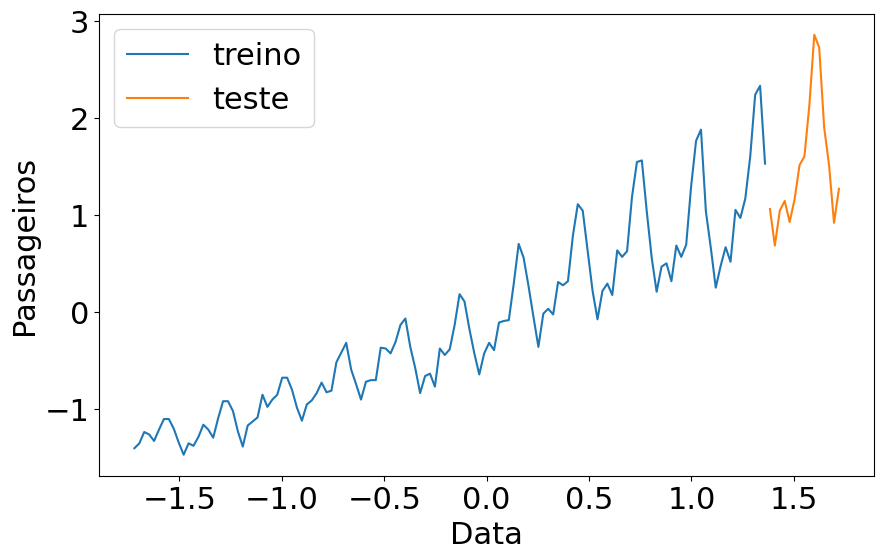

In [105]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão linear

In [106]:
# y = ax +b
regressor = Sequential()
regressor.add(Dense(units=1,
                    input_dim=1,
                    kernel_initializer='Ones',
                    activation='linear',
                    use_bias=False
                    ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
regressor.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
regressor.fit(xtreino, ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1314  


In [110]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0.5, 0, 'Data')

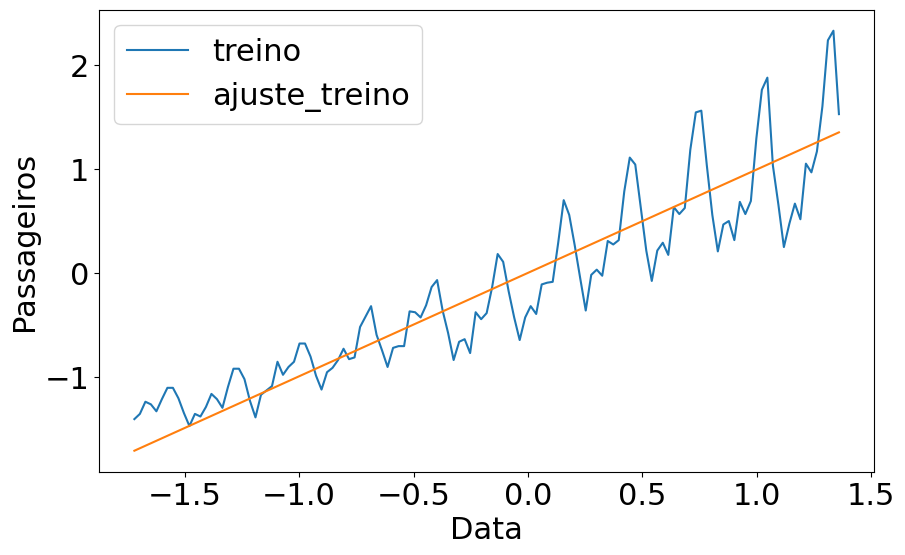

In [111]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

plt.ylabel('Passageiros')
plt.xlabel('Data')

In [112]:
d = {"tempo": xtreino,
     "passageiros": ytreino,
     "ajuste": y_predict[:,0]
     }
resultados = pd.DataFrame(data=d)

In [113]:
resultados

,tempo,passageiros,ajuste
0,-1.720064,-1.407779,-1.712111
1,-1.696007,-1.357590,-1.688165
2,-1.671950,-1.240483,-1.664219
3,-1.647894,-1.265578,-1.640274
4,-1.623837,-1.332496,-1.616328
...,...,...,...
124,1.262984,1.168570,1.257144
125,1.287041,1.603538,1.281090
126,1.311098,2.239260,1.305035
127,1.335155,2.331272,1.328981


In [114]:
resultado_transf = sc.inverse_transform(resultados[['tempo', 'ajuste']])

In [115]:
resultado_transf = pd.DataFrame(resultado_transf)

In [116]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

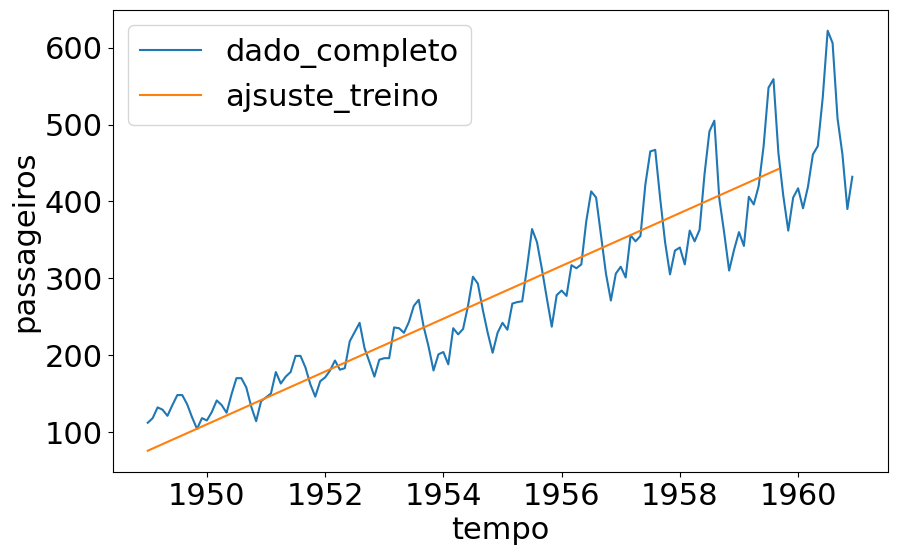

In [117]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')

In [118]:
y_predict_teste = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [119]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [120]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)


In [121]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [122]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

In [123]:
resultado_transf_teste

,tempo,passageiros
0,1959.750000,444.902347
1,1959.833333,447.765031
2,1959.916667,450.627701
3,1960.000000,453.490371
4,1960.083333,456.353055
5,1960.166667,459.215725
6,1960.250000,462.078409
7,1960.333333,464.941065
8,1960.416667,467.803735
9,1960.500000,470.666419


<Axes: xlabel='tempo', ylabel='passageiros'>

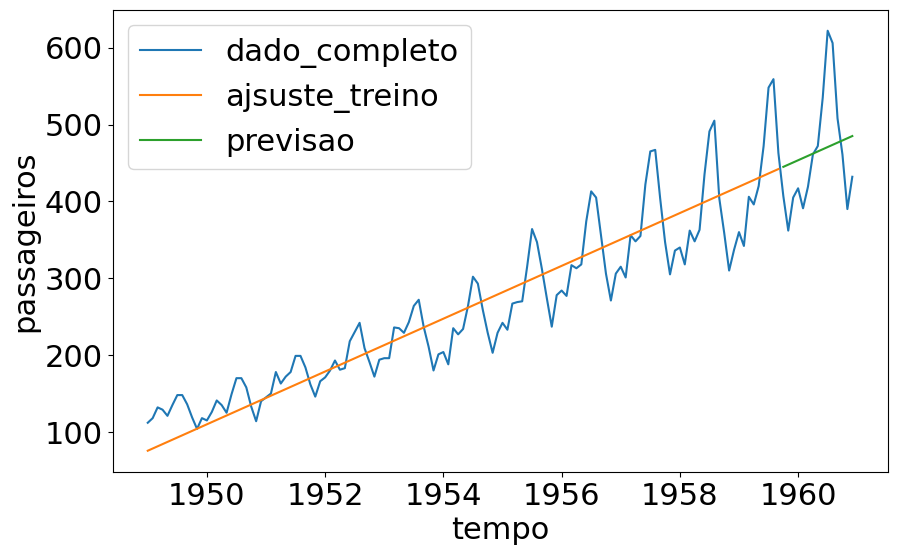

In [124]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste,label='previsao')

In [125]:
# z = w1*x1+b

In [126]:
regressor2 = Sequential()

In [127]:
regressor2.add(Dense(units=8,
                    input_dim=1,
                    kernel_initializer='random_uniform',
                    activation='sigmoid',
                    use_bias=False
                    ))

regressor2.add(Dense(8,
                     kernel_initializer='random_uniform',
                     activation='sigmoid',
                     use_bias=False))

regressor2.add(Dense(1,
                     kernel_initializer='random_uniform',
                     activation='linear',
                     use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [129]:
regressor2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [130]:
regressor2.fit(xtreino, ytreino,epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8176  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8556 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7971 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7877 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8363 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7663 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7733 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7190 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7963 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7321 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7901 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8547 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7719 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7560 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7844 
Epoch 16/500
5/5 ━

In [131]:
y_predict = regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [132]:
y_predict_teste = regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Text(0.5, 0, 'Data')

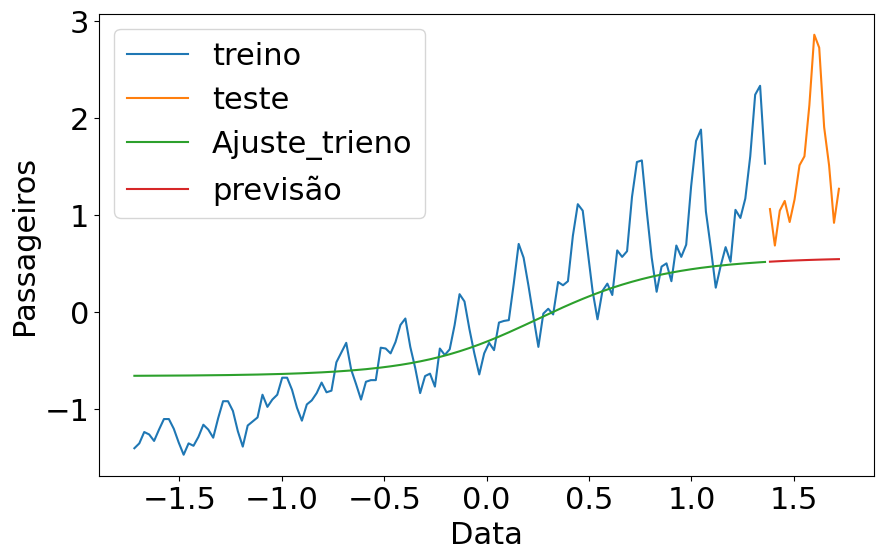

In [133]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_trieno')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [134]:
import numpy as np

In [135]:
vetor = pd.DataFrame(ytreino)[0]

In [136]:
def separa_dados(vetor,n_passos):
  X_novo, y_novo = [],[]

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [137]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [138]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [139]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [140]:
vetor2 = pd.DataFrame(yteste)[0]

In [141]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [142]:
regressor3 = Sequential()

In [143]:
regressor3.add(Dense(8,input_dim=1,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor3.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor3.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
regressor3.compile(optimizer='adam', loss='mean_squared_error')

In [145]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7655  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7699 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7326
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7851 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6357
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6273 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6285 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6211 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5638 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5050
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5846 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4579 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3879
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3886  
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3674 
Epoch 16/100
4/4 

In [146]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


<Axes: xlabel='tempo', ylabel='0'>

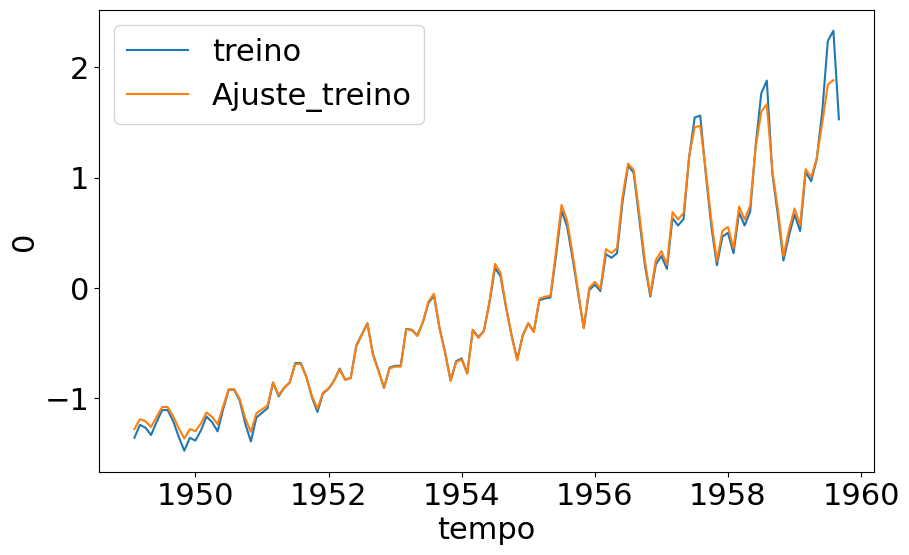

In [147]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')

In [148]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [149]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

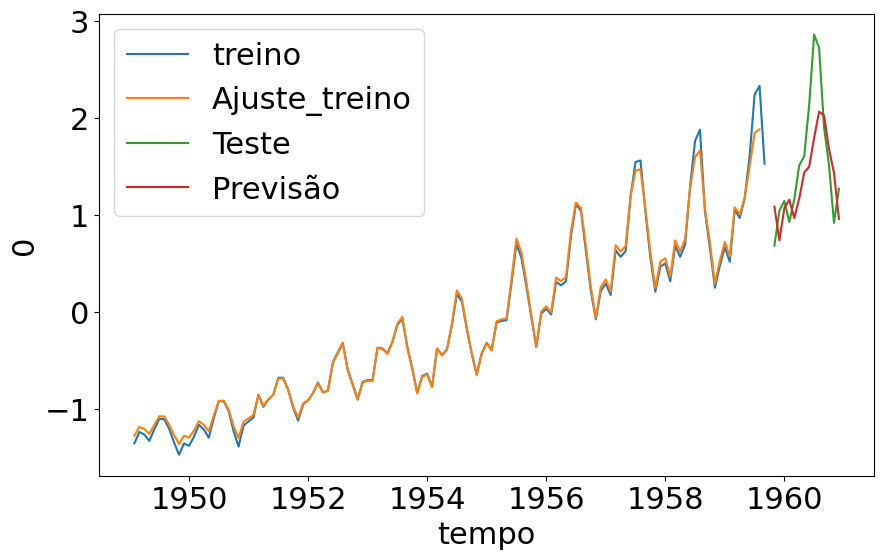

In [150]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[130:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[130:144], label='Previsão')

In [151]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [152]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [153]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [154]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [155]:
regressor4 = Sequential()

In [156]:
regressor4.add(Dense(8,input_dim=4,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor4.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor4.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [157]:
regressor4.compile(optimizer='adam', loss='mean_squared_error')

In [158]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7662  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6808 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5473
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4952 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4144
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3090 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2793 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2372 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2526 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1655
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1518
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1558 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1691
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1563
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1558 
Epoch 16/300
4/4 ━

In [159]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [160]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [161]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [162]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [163]:
# sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
# sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
# sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
# sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')

<Axes: xlabel='tempo'>

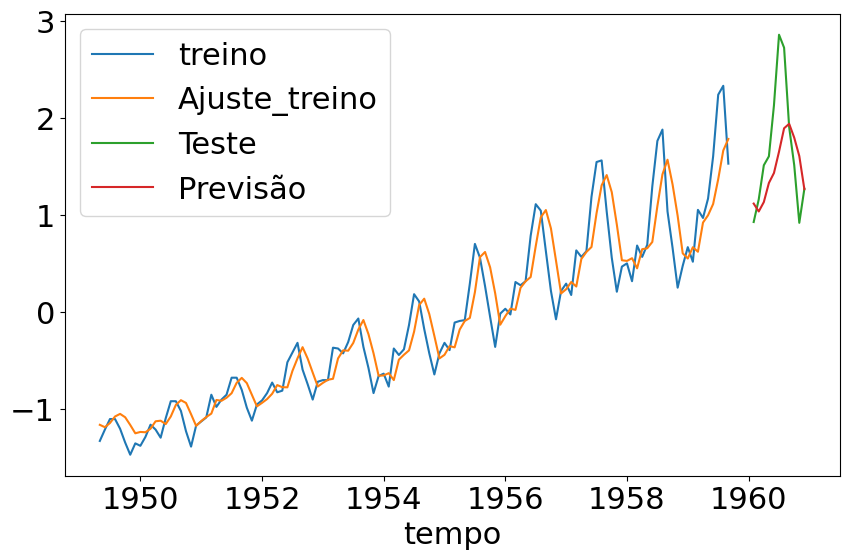

In [164]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')

In [165]:
bike = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/bicicletas.csv')

In [166]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [167]:
bike['datas'] = pd.to_datetime(bike['datas'])

<Axes: xlabel='datas', ylabel='contagem'>

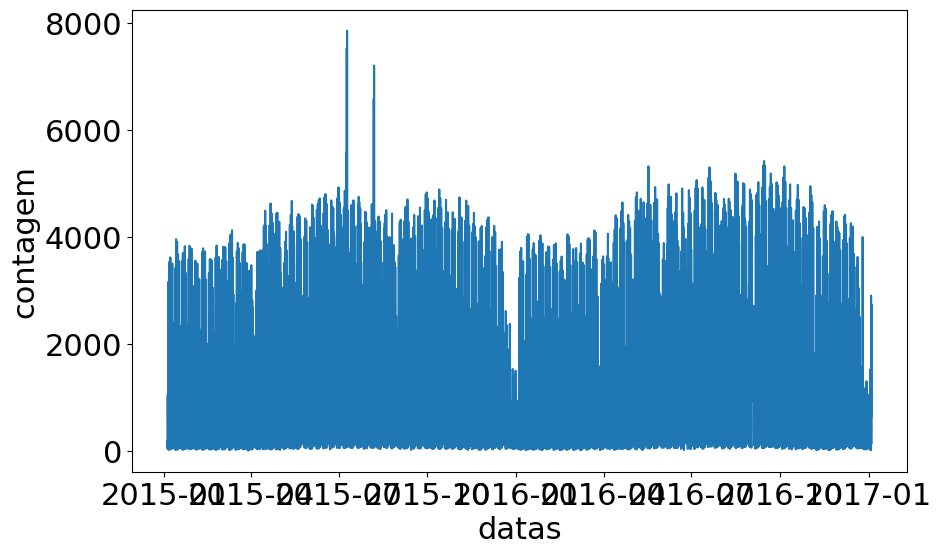

In [168]:
sns.lineplot(x='datas',y='contagem', data=bike)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

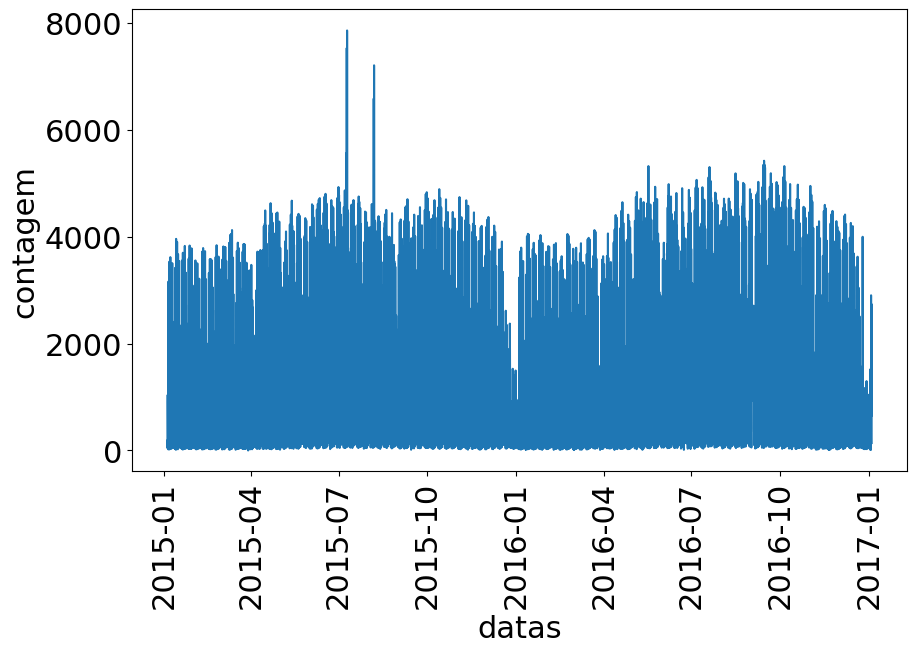

In [169]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=90)

In [170]:
sc2 = StandardScaler()

In [171]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [172]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [173]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [174]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

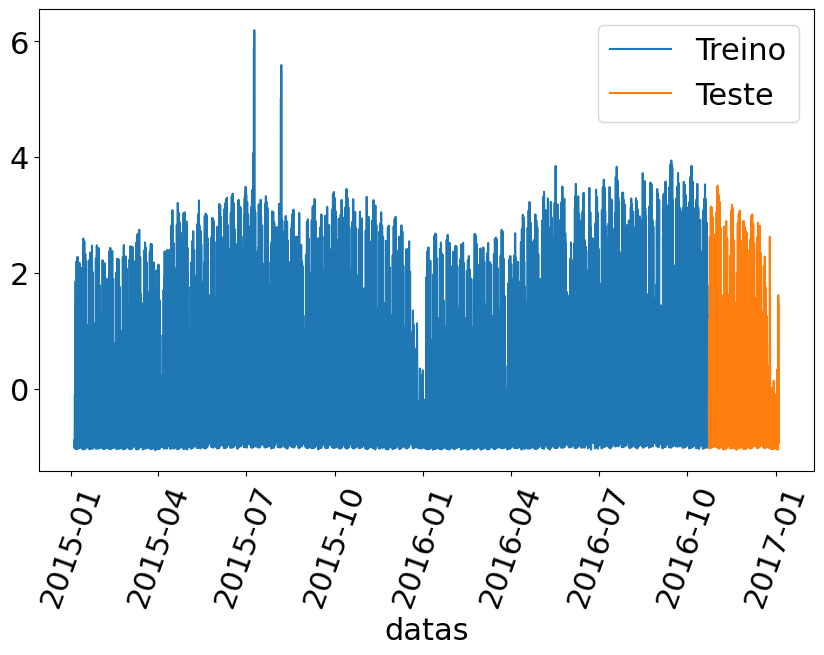

In [175]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='Treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='Teste')
plt.xticks(rotation=70)

In [176]:
vetor = pd.DataFrame(ytreino)[0]

In [177]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [178]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [179]:
vetor2 = pd.DataFrame(yteste)[0]

In [180]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [181]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [182]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))
# xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [183]:
recorrente = Sequential()

In [184]:
from tensorflow.keras.layers import LSTM

In [185]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [186]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [187]:
recorrente.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)